## Import

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
from itertools import chain
from IPython.display import clear_output

# for reading and displaying images
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.models.model_util import load_model, save_checkpoint

# other files
from src.training.run import *
from src.data.data_util import *

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary

# Maintenance
import mlflow
from DeepNotion.build import *

## Load Configurations and set Seed

In [2]:
from src.config import *
cfg = load_config()

random_seed = cfg.seed
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

## MLFlow Init

In [3]:
exp_name = '3dcnn_smri_comparison_test'
try:
    mlflow.create_experiment(name=exp_name)
except:
    print('Existing experiment')
    
mlflow.set_experiment(exp_name)

Existing experiment


## Tracking on Notion

In [4]:
cfg['notion']['use'] = False

### Load Preexisting page

In [6]:
if cfg['notion']['use']:
    root, client = login(cfg['notion'])
    page = root.children[-1]

### Make New Page

In [18]:
if cfg['notion']['use']:

    print(today())
    root, client = login(cfg['notion'])
    page = make_page(root)

    toggle = page.children.add_new(ToggleBlock, title='Configuration')

    print("Saving Configurations ...")
    for name, value in cfg.get_dict().items():
        if name not in ['notion']:
            txt = '**' + name + '** ' + str(value)
            print(txt)
            toggle.children.add_new(BulletedListBlock, title=txt)

#     fold_db = make_db(page, schema=cfg.schema)
#     test_db = make_db(page, schema=cfg.test_schema)

2021.02.08.20:14


## Train

### No Fold

In [4]:
#################################
### CHANGE CONFIGURATION HERE ###
#################################
cfg.model_name = 'sfcn'
cfg.channel_number = [32, 64, 128, 256, 256, 64]
cfg.registration = 'tlrc'
cfg.learning_rate = 1e-5 # from checkpoint
#################################
cfg.refresh()
model, cfg.device = load_model(cfg.model_name, verbose=False, cfg=cfg)
model.load_state_dict(torch.load('./result/models/2021_03_31_1453_sfcn/best_sfcn_ep96-100_sd42_mae6.614.pth'))
print(cfg.device)

optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

trn_dp, tst_dp = DataPacket(), DataPacket()

run_date = today().replace('.', '_').replace(':', '') + '_' + cfg.model_name
condition = 'TLRC Aug, 100 ep, SFCN Original (256) extra run - starting from 98'

mlflow.start_run(run_name=condition)

Model Sfcn is selected.
cuda:0


<ActiveRun: >

Epoch 1 / 100 | BEST MAE 8.000 | LR 1e-05
[train] 428.6 sec [valid] 14.7 sec 
Saving ...
[TRAIN]:: Loss=144.221 Mae=9.363 Rmse=11.797 Corr=0.782 
[TEST ]:: Loss=69.754 Mae=6.854 Rmse=8.146 Corr=0.886 


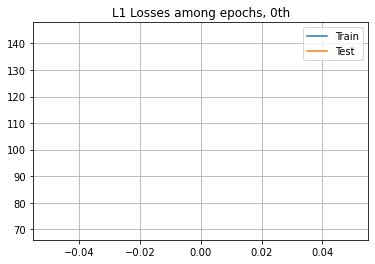

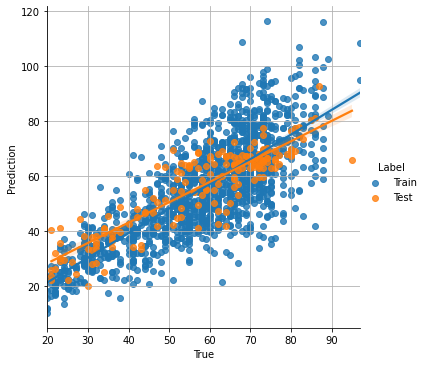

Saving ...
Epoch 2 / 100 | BEST MAE 6.854 | LR 1e-05
[train] 437.6 sec [valid] 15.5 sec 
Saving ...
[TRAIN]:: Loss=150.005 Mae=9.467 Rmse=11.975 Corr=0.778 
[TEST ]:: Loss=68.015 Mae=6.765 Rmse=8.047 Corr=0.887 
Epoch 3 / 100 | BEST MAE 6.765 | LR 1e-05
[train] 432.3 sec [valid] 14.7 sec 
[TRAIN]:: Loss=132.081 Mae=9.018 Rmse=11.258 Corr=0.795 
[TEST ]:: Loss=70.598 Mae=6.923 Rmse=8.206 Corr=0.885 
Epoch 4 / 100 | BEST MAE 6.765 | LR 1e-05
[train] 391.5 sec [valid] 14.9 sec 
[TRAIN]:: Loss=145.020 Mae=9.440 Rmse=11.820 Corr=0.771 
[TEST ]:: Loss=71.505 Mae=6.875 Rmse=8.240 Corr=0.885 
Epoch 5 / 100 | BEST MAE 6.765 | LR 1e-05
[train] 386.8 sec [valid] 14.6 sec 
Saving ...
[TRAIN]:: Loss=146.248 Mae=9.297 Rmse=11.762 Corr=0.774 
[TEST ]:: Loss=69.417 Mae=6.750 Rmse=8.120 Corr=0.885 
Epoch 6 / 100 | BEST MAE 6.750 | LR 1e-05
[train] 387.7 sec [valid] 14.7 sec 
[TRAIN]:: Loss=135.258 Mae=8.979 Rmse=11.449 Corr=0.792 
[TEST ]:: Loss=69.078 Mae=6.801 Rmse=8.099 Corr=0.888 


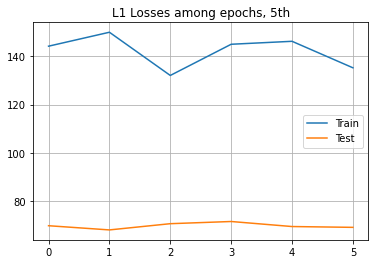

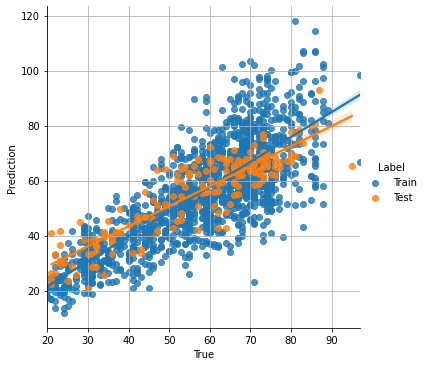

Saving ...
Epoch 7 / 100 | BEST MAE 6.750 | LR 1e-05
[train] 388.3 sec [valid] 15.0 sec 
Saving ...
[TRAIN]:: Loss=152.467 Mae=9.597 Rmse=12.124 Corr=0.771 
[TEST ]:: Loss=67.573 Mae=6.716 Rmse=8.021 Corr=0.888 
Epoch 8 / 100 | BEST MAE 6.716 | LR 1e-05
[train] 383.6 sec [valid] 14.7 sec 
[TRAIN]:: Loss=141.391 Mae=9.156 Rmse=11.653 Corr=0.781 
[TEST ]:: Loss=68.220 Mae=6.716 Rmse=8.065 Corr=0.887 
Epoch 9 / 100 | BEST MAE 6.716 | LR 1e-05
[train] 384.0 sec [valid] 14.8 sec 
[TRAIN]:: Loss=146.207 Mae=9.395 Rmse=11.895 Corr=0.776 
[TEST ]:: Loss=70.955 Mae=6.858 Rmse=8.204 Corr=0.888 
Epoch 10 / 100 | BEST MAE 6.716 | LR 1e-05
[train] 385.0 sec [valid] 14.6 sec 
Saving ...
[TRAIN]:: Loss=144.217 Mae=9.315 Rmse=11.807 Corr=0.779 
[TEST ]:: Loss=68.078 Mae=6.695 Rmse=8.052 Corr=0.887 
Epoch 11 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 445.1 sec [valid] 15.5 sec 
[TRAIN]:: Loss=142.254 Mae=9.211 Rmse=11.692 Corr=0.783 
[TEST ]:: Loss=70.998 Mae=6.912 Rmse=8.213 Corr=0.888 


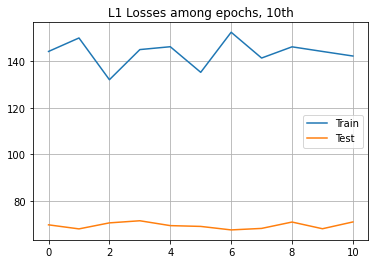

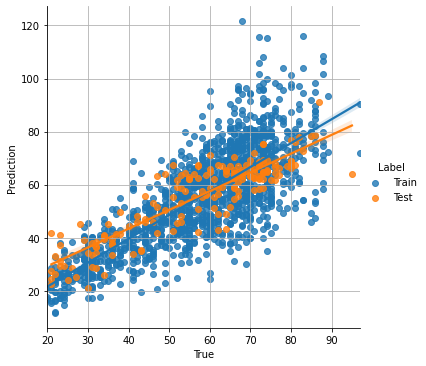

Saving ...
Epoch 12 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 468.9 sec [valid] 14.7 sec 
[TRAIN]:: Loss=142.974 Mae=9.158 Rmse=11.730 Corr=0.778 
[TEST ]:: Loss=68.381 Mae=6.724 Rmse=8.062 Corr=0.889 
Epoch 13 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 441.2 sec [valid] 15.2 sec 
[TRAIN]:: Loss=140.567 Mae=9.038 Rmse=11.584 Corr=0.785 
[TEST ]:: Loss=69.708 Mae=6.793 Rmse=8.149 Corr=0.888 
Epoch 14 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 488.5 sec [valid] 14.7 sec 
[TRAIN]:: Loss=146.590 Mae=9.221 Rmse=11.830 Corr=0.781 
[TEST ]:: Loss=69.824 Mae=6.821 Rmse=8.167 Corr=0.888 
Epoch 15 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 367.4 sec [valid] 15.3 sec 
[TRAIN]:: Loss=133.364 Mae=8.867 Rmse=11.362 Corr=0.796 
[TEST ]:: Loss=68.540 Mae=6.755 Rmse=8.070 Corr=0.890 
Epoch 16 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 378.5 sec [valid] 14.7 sec 
[TRAIN]:: Loss=143.098 Mae=9.311 Rmse=11.765 Corr=0.782 
[TEST ]:: Loss=68.369 Mae=6.715 Rmse=8.047 Corr=0.891 


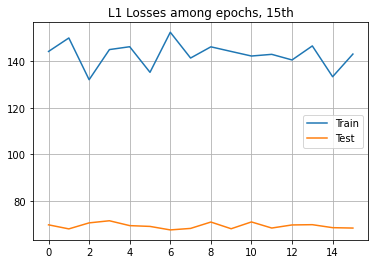

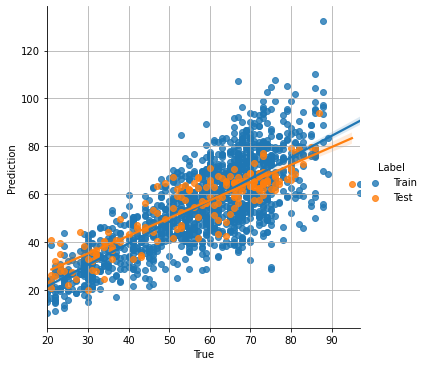

Saving ...
Epoch 17 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 375.1 sec [valid] 15.5 sec 
[TRAIN]:: Loss=127.109 Mae=8.691 Rmse=11.064 Corr=0.803 
[TEST ]:: Loss=68.300 Mae=6.718 Rmse=8.061 Corr=0.890 
Epoch 18 / 100 | BEST MAE 6.695 | LR 1e-05
[train] 418.6 sec [valid] 14.8 sec 
Saving ...
[TRAIN]:: Loss=136.267 Mae=9.033 Rmse=11.433 Corr=0.790 
[TEST ]:: Loss=66.260 Mae=6.574 Rmse=7.947 Corr=0.890 
Epoch 19 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 429.4 sec [valid] 15.1 sec 
[TRAIN]:: Loss=138.801 Mae=9.106 Rmse=11.562 Corr=0.793 
[TEST ]:: Loss=68.123 Mae=6.740 Rmse=8.062 Corr=0.889 
Epoch 20 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 424.7 sec [valid] 14.6 sec 
[TRAIN]:: Loss=135.813 Mae=9.001 Rmse=11.409 Corr=0.793 
[TEST ]:: Loss=68.175 Mae=6.769 Rmse=8.050 Corr=0.891 
Epoch 21 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 449.1 sec [valid] 14.9 sec 
[TRAIN]:: Loss=133.976 Mae=8.882 Rmse=11.383 Corr=0.794 
[TEST ]:: Loss=69.575 Mae=6.806 Rmse=8.155 Corr=0.886 


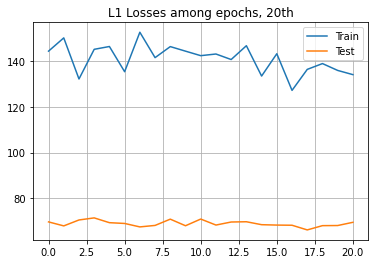

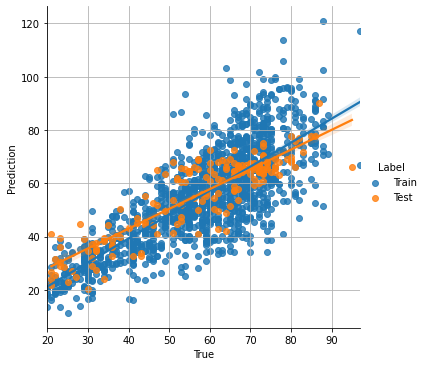

Saving ...
Epoch 22 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 396.5 sec [valid] 16.9 sec 
[TRAIN]:: Loss=134.468 Mae=8.968 Rmse=11.319 Corr=0.794 
[TEST ]:: Loss=69.417 Mae=6.777 Rmse=8.126 Corr=0.890 
Epoch 23 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 559.1 sec [valid] 15.8 sec 
[TRAIN]:: Loss=136.133 Mae=9.049 Rmse=11.446 Corr=0.793 
[TEST ]:: Loss=69.675 Mae=6.800 Rmse=8.126 Corr=0.890 
Epoch 24 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 403.8 sec [valid] 15.9 sec 
[TRAIN]:: Loss=129.922 Mae=8.807 Rmse=11.176 Corr=0.800 
[TEST ]:: Loss=67.921 Mae=6.710 Rmse=8.018 Corr=0.889 
Epoch 25 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 393.3 sec [valid] 14.7 sec 
[TRAIN]:: Loss=140.508 Mae=9.210 Rmse=11.633 Corr=0.787 
[TEST ]:: Loss=67.870 Mae=6.697 Rmse=8.032 Corr=0.890 
Epoch 26 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 421.2 sec [valid] 15.0 sec 
[TRAIN]:: Loss=133.113 Mae=8.962 Rmse=11.317 Corr=0.798 
[TEST ]:: Loss=67.399 Mae=6.734 Rmse=8.007 Corr=0.891 


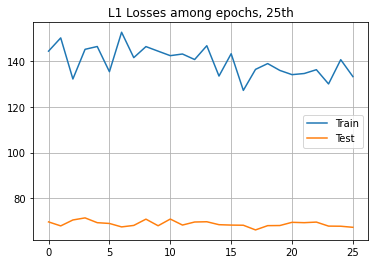

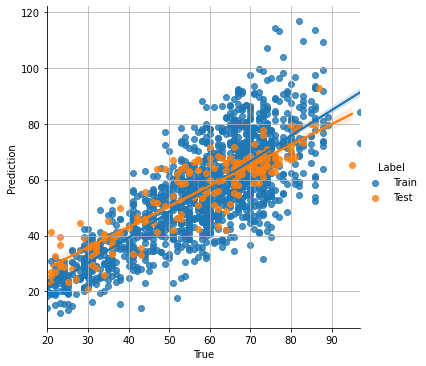

Saving ...
Epoch 27 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 376.2 sec [valid] 14.8 sec 
[TRAIN]:: Loss=137.332 Mae=9.005 Rmse=11.472 Corr=0.787 
[TEST ]:: Loss=68.158 Mae=6.740 Rmse=8.045 Corr=0.891 
Epoch 28 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 418.7 sec [valid] 15.1 sec 
[TRAIN]:: Loss=130.771 Mae=8.821 Rmse=11.274 Corr=0.798 
[TEST ]:: Loss=74.043 Mae=7.009 Rmse=8.411 Corr=0.885 
Epoch 29 / 100 | BEST MAE 6.574 | LR 1e-05
[train] 418.5 sec [valid] 14.6 sec 
[TRAIN]:: Loss=146.956 Mae=9.428 Rmse=11.891 Corr=0.778 
[TEST ]:: Loss=70.633 Mae=6.865 Rmse=8.189 Corr=0.888 
Epoch 30 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 415.6 sec [valid] 15.4 sec 
[TRAIN]:: Loss=136.979 Mae=9.003 Rmse=11.455 Corr=0.787 
[TEST ]:: Loss=69.210 Mae=6.771 Rmse=8.107 Corr=0.888 
Epoch 31 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 464.0 sec [valid] 15.2 sec 
[TRAIN]:: Loss=139.636 Mae=9.108 Rmse=11.619 Corr=0.788 
[TEST ]:: Loss=69.559 Mae=6.788 Rmse=8.128 Corr=0.888 


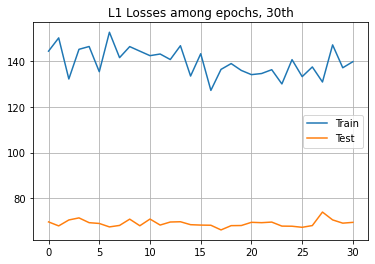

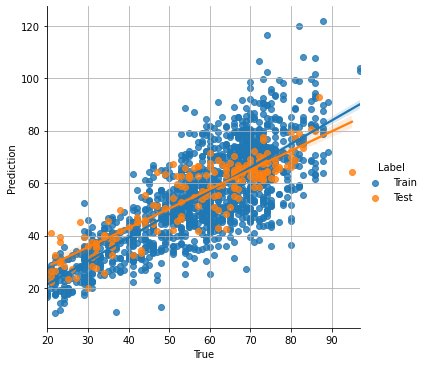

Saving ...
Epoch 32 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 404.7 sec [valid] 15.8 sec 
[TRAIN]:: Loss=141.465 Mae=9.136 Rmse=11.630 Corr=0.787 
[TEST ]:: Loss=69.222 Mae=6.767 Rmse=8.108 Corr=0.888 
Epoch 33 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 367.9 sec [valid] 14.7 sec 
[TRAIN]:: Loss=134.218 Mae=9.010 Rmse=11.308 Corr=0.797 
[TEST ]:: Loss=69.364 Mae=6.778 Rmse=8.117 Corr=0.888 
Epoch 34 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 415.0 sec [valid] 14.8 sec 
[TRAIN]:: Loss=136.145 Mae=8.999 Rmse=11.443 Corr=0.788 
[TEST ]:: Loss=69.380 Mae=6.782 Rmse=8.117 Corr=0.888 
Epoch 35 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 383.9 sec [valid] 14.7 sec 
[TRAIN]:: Loss=135.523 Mae=9.082 Rmse=11.420 Corr=0.796 
[TEST ]:: Loss=68.905 Mae=6.742 Rmse=8.089 Corr=0.888 
Epoch 36 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 363.4 sec [valid] 14.5 sec 
[TRAIN]:: Loss=143.466 Mae=9.211 Rmse=11.744 Corr=0.788 
[TES

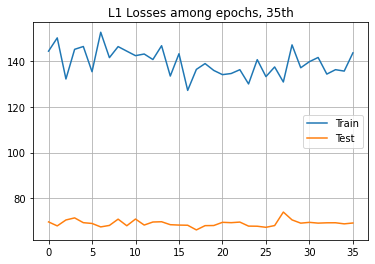

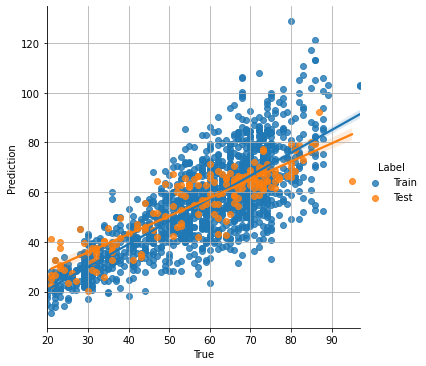

Saving ...
Epoch 37 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 364.4 sec [valid] 14.5 sec 
[TRAIN]:: Loss=136.510 Mae=9.051 Rmse=11.453 Corr=0.787 
[TEST ]:: Loss=68.924 Mae=6.756 Rmse=8.091 Corr=0.888 
Epoch 38 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 364.0 sec [valid] 14.5 sec 
[TRAIN]:: Loss=144.598 Mae=9.350 Rmse=11.818 Corr=0.789 
[TEST ]:: Loss=69.366 Mae=6.793 Rmse=8.120 Corr=0.888 
Epoch 39 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 364.2 sec [valid] 14.7 sec 
[TRAIN]:: Loss=144.424 Mae=9.322 Rmse=11.776 Corr=0.778 
[TEST ]:: Loss=69.288 Mae=6.788 Rmse=8.115 Corr=0.888 
Epoch 40 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-06
[train] 364.0 sec [valid] 14.4 sec 
[TRAIN]:: Loss=139.677 Mae=9.153 Rmse=11.570 Corr=0.792 
[TEST ]:: Loss=69.257 Mae=6.788 Rmse=8.114 Corr=0.888 
Epoch 41 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.9 sec [valid] 14.5 sec 
[TRAIN]:: Loss=136.521 Mae=9.073 Rmse=11.428 Corr=0.788 
[TES

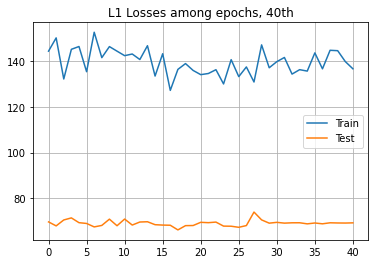

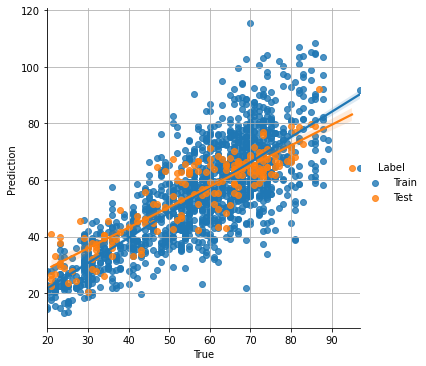

Saving ...
Epoch 42 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.7 sec [valid] 14.7 sec 
[TRAIN]:: Loss=131.072 Mae=8.679 Rmse=11.205 Corr=0.798 
[TEST ]:: Loss=69.212 Mae=6.783 Rmse=8.112 Corr=0.888 
Epoch 43 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 364.3 sec [valid] 14.4 sec 
[TRAIN]:: Loss=142.252 Mae=9.243 Rmse=11.669 Corr=0.783 
[TEST ]:: Loss=69.457 Mae=6.800 Rmse=8.127 Corr=0.888 
Epoch 44 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.6 sec [valid] 15.1 sec 
[TRAIN]:: Loss=126.978 Mae=8.698 Rmse=11.071 Corr=0.805 
[TEST ]:: Loss=69.244 Mae=6.785 Rmse=8.114 Corr=0.888 
Epoch 45 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.5 sec [valid] 14.4 sec 
[TRAIN]:: Loss=127.446 Mae=8.818 Rmse=11.135 Corr=0.801 
[TEST ]:: Loss=69.623 Mae=6.810 Rmse=8.136 Corr=0.888 
Epoch 46 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 364.2 sec [valid] 14.4 sec 
[TRAIN]:: Loss=132.203 Mae=8.884 Rmse=11.269 Corr=0.803 
[TES

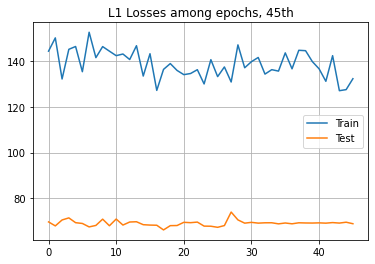

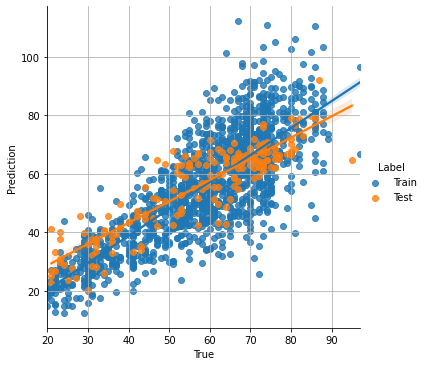

Saving ...
Epoch 47 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 364.4 sec [valid] 14.4 sec 
[TRAIN]:: Loss=135.349 Mae=8.950 Rmse=11.371 Corr=0.796 
[TEST ]:: Loss=69.398 Mae=6.797 Rmse=8.124 Corr=0.888 
Epoch 48 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.6 sec [valid] 14.6 sec 
[TRAIN]:: Loss=130.538 Mae=8.834 Rmse=11.191 Corr=0.792 
[TEST ]:: Loss=69.584 Mae=6.807 Rmse=8.134 Corr=0.888 
Epoch 49 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 363.7 sec [valid] 14.4 sec 
[TRAIN]:: Loss=133.523 Mae=8.854 Rmse=11.268 Corr=0.795 
[TEST ]:: Loss=69.525 Mae=6.805 Rmse=8.132 Corr=0.888 
Epoch 50 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 364.4 sec [valid] 14.4 sec 
[TRAIN]:: Loss=130.081 Mae=8.799 Rmse=11.085 Corr=0.796 
[TEST ]:: Loss=69.447 Mae=6.799 Rmse=8.127 Corr=0.888 
Epoch 51 / 100 | BEST MAE 6.574 | LR 1.0000000000000002e-07
[train] 365.0 sec [valid] 14.5 sec 
[TRAIN]:: Loss=138.200 Mae=8.996 Rmse=11.482 Corr=0.787 
[TES

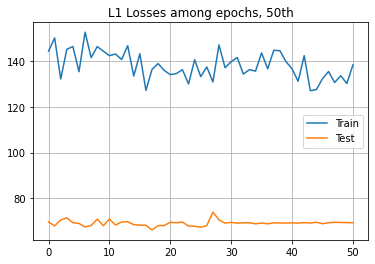

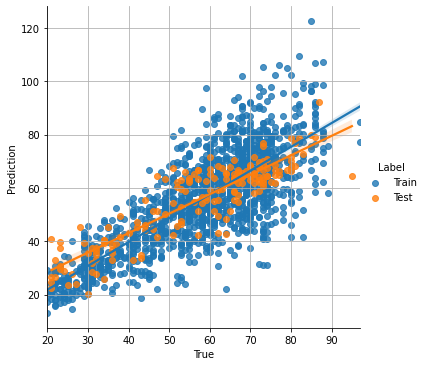

Saving ...
Epoch 52 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 364.2 sec [valid] 14.6 sec 
[TRAIN]:: Loss=142.631 Mae=9.074 Rmse=11.671 Corr=0.782 
[TEST ]:: Loss=69.331 Mae=6.791 Rmse=8.120 Corr=0.888 
Epoch 53 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.6 sec [valid] 14.5 sec 
[TRAIN]:: Loss=142.992 Mae=9.188 Rmse=11.673 Corr=0.773 
[TEST ]:: Loss=69.362 Mae=6.792 Rmse=8.121 Corr=0.889 
Epoch 54 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 364.0 sec [valid] 14.6 sec 
[TRAIN]:: Loss=138.840 Mae=8.961 Rmse=11.508 Corr=0.790 
[TEST ]:: Loss=69.551 Mae=6.806 Rmse=8.132 Corr=0.888 
Epoch 55 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.8 sec [valid] 14.7 sec 
[TRAIN]:: Loss=133.880 Mae=8.889 Rmse=11.301 Corr=0.790 
[TEST ]:: Loss=69.523 Mae=6.805 Rmse=8.131 Corr=0.888 
Epoch 56 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.2 sec [valid] 14.3 sec 
[TRAIN]:: Loss=137.787 Mae=9.040 Rmse=11.492 Corr=0.783 
[TES

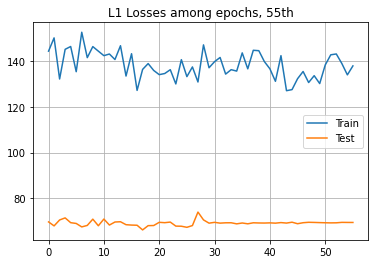

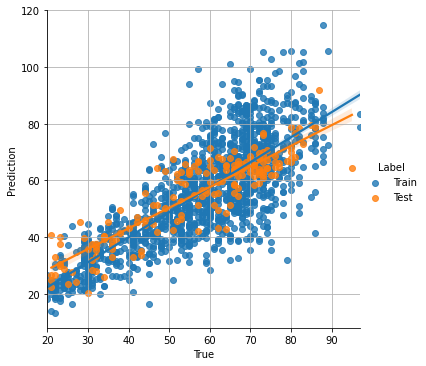

Saving ...
Epoch 57 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.8 sec [valid] 14.6 sec 
[TRAIN]:: Loss=128.899 Mae=8.922 Rmse=11.179 Corr=0.803 
[TEST ]:: Loss=69.434 Mae=6.798 Rmse=8.126 Corr=0.888 
Epoch 58 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.6 sec [valid] 14.6 sec 
[TRAIN]:: Loss=136.328 Mae=9.035 Rmse=11.460 Corr=0.787 
[TEST ]:: Loss=69.222 Mae=6.782 Rmse=8.113 Corr=0.889 
Epoch 59 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 364.4 sec [valid] 14.5 sec 
[TRAIN]:: Loss=136.090 Mae=9.154 Rmse=11.424 Corr=0.788 
[TEST ]:: Loss=69.070 Mae=6.772 Rmse=8.104 Corr=0.888 
Epoch 60 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.3 sec [valid] 14.5 sec 
[TRAIN]:: Loss=134.647 Mae=8.834 Rmse=11.322 Corr=0.791 
[TEST ]:: Loss=69.296 Mae=6.787 Rmse=8.117 Corr=0.889 
Epoch 61 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 362.8 sec [valid] 14.9 sec 
[TRAIN]:: Loss=137.877 Mae=9.066 Rmse=11.511 Corr=0.798 
[TES

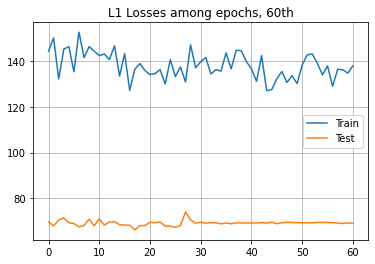

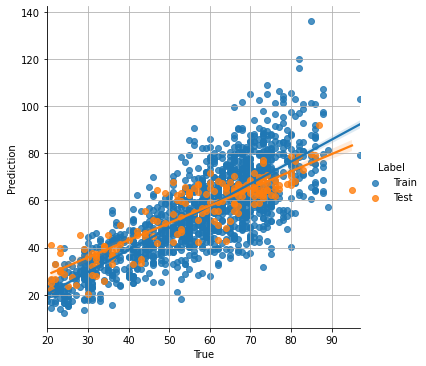

Saving ...
Epoch 62 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.6 sec [valid] 14.6 sec 
[TRAIN]:: Loss=129.849 Mae=8.829 Rmse=11.143 Corr=0.799 
[TEST ]:: Loss=69.131 Mae=6.775 Rmse=8.107 Corr=0.889 
Epoch 63 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.8 sec [valid] 14.9 sec 
[TRAIN]:: Loss=138.948 Mae=9.080 Rmse=11.513 Corr=0.790 
[TEST ]:: Loss=69.393 Mae=6.795 Rmse=8.123 Corr=0.888 
Epoch 64 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.6 sec [valid] 14.4 sec 
[TRAIN]:: Loss=127.734 Mae=8.821 Rmse=11.099 Corr=0.805 
[TEST ]:: Loss=69.008 Mae=6.767 Rmse=8.100 Corr=0.888 
Epoch 65 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.3 sec [valid] 14.3 sec 
[TRAIN]:: Loss=135.984 Mae=9.096 Rmse=11.481 Corr=0.794 
[TEST ]:: Loss=69.182 Mae=6.780 Rmse=8.111 Corr=0.888 
Epoch 66 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.1 sec [valid] 14.5 sec 
[TRAIN]:: Loss=144.496 Mae=9.369 Rmse=11.774 Corr=0.783 
[TES

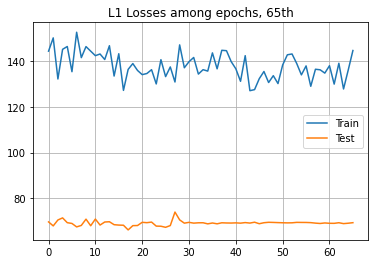

Saving ...
Epoch 67 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.8 sec [valid] 14.5 sec 
[TRAIN]:: Loss=122.112 Mae=8.593 Rmse=10.862 Corr=0.807 
[TEST ]:: Loss=69.174 Mae=6.779 Rmse=8.110 Corr=0.888 
Epoch 68 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 363.1 sec [valid] 14.6 sec 
[TRAIN]:: Loss=124.821 Mae=8.626 Rmse=10.974 Corr=0.808 
[TEST ]:: Loss=69.416 Mae=6.796 Rmse=8.124 Corr=0.889 
Epoch 69 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 373.2 sec [valid] 15.0 sec 
[TRAIN]:: Loss=123.478 Mae=8.617 Rmse=10.907 Corr=0.810 
[TEST ]:: Loss=69.670 Mae=6.814 Rmse=8.139 Corr=0.888 
Epoch 70 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.4 sec [valid] 14.8 sec 
[TRAIN]:: Loss=134.864 Mae=8.984 Rmse=11.418 Corr=0.794 
[TEST ]:: Loss=69.606 Mae=6.810 Rmse=8.136 Corr=0.888 
Epoch 71 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.4 sec [valid] 15.0 sec 
[TRAIN]:: Loss=128.379 Mae=8.786 Rmse=11.140 Corr=0.800 
[TES

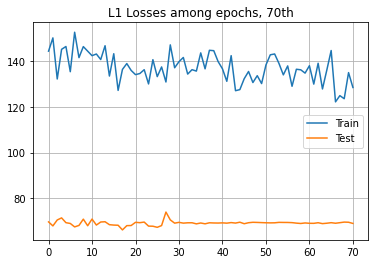

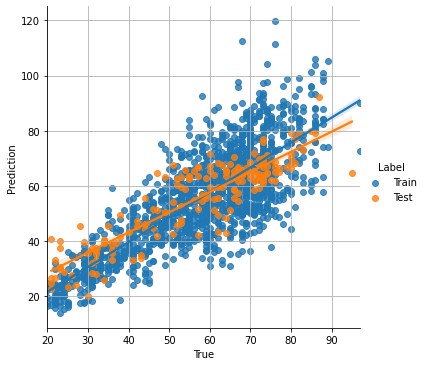

Saving ...
Epoch 72 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 375.8 sec [valid] 14.8 sec 
[TRAIN]:: Loss=133.618 Mae=8.984 Rmse=11.373 Corr=0.790 
[TEST ]:: Loss=69.047 Mae=6.770 Rmse=8.103 Corr=0.888 
Epoch 73 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 383.9 sec [valid] 15.3 sec 
[TRAIN]:: Loss=143.891 Mae=9.286 Rmse=11.750 Corr=0.781 
[TEST ]:: Loss=69.296 Mae=6.788 Rmse=8.118 Corr=0.888 
Epoch 74 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.0 sec [valid] 14.8 sec 
[TRAIN]:: Loss=134.577 Mae=9.060 Rmse=11.357 Corr=0.794 
[TEST ]:: Loss=69.380 Mae=6.793 Rmse=8.122 Corr=0.889 
Epoch 75 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.4 sec [valid] 15.1 sec 
[TRAIN]:: Loss=132.974 Mae=8.854 Rmse=11.299 Corr=0.794 
[TEST ]:: Loss=69.317 Mae=6.789 Rmse=8.119 Corr=0.888 
Epoch 76 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.0 sec [valid] 15.1 sec 
[TRAIN]:: Loss=134.085 Mae=8.890 Rmse=11.303 Corr=0.788 
[TES

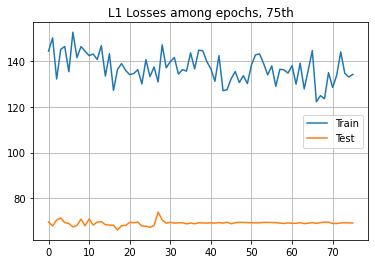

Saving ...
Epoch 77 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.5 sec [valid] 15.0 sec 
[TRAIN]:: Loss=133.374 Mae=8.790 Rmse=11.353 Corr=0.792 
[TEST ]:: Loss=69.052 Mae=6.770 Rmse=8.103 Corr=0.888 
Epoch 78 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.1 sec [valid] 14.9 sec 
[TRAIN]:: Loss=131.186 Mae=8.955 Rmse=11.225 Corr=0.795 
[TEST ]:: Loss=69.238 Mae=6.784 Rmse=8.114 Corr=0.888 
Epoch 79 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.8 sec [valid] 15.1 sec 
[TRAIN]:: Loss=128.864 Mae=8.888 Rmse=11.146 Corr=0.803 
[TEST ]:: Loss=69.889 Mae=6.829 Rmse=8.153 Corr=0.888 
Epoch 80 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.4 sec [valid] 15.2 sec 
[TRAIN]:: Loss=118.661 Mae=8.519 Rmse=10.707 Corr=0.812 
[TEST ]:: Loss=69.619 Mae=6.809 Rmse=8.136 Corr=0.888 
Epoch 81 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.5 sec [valid] 14.8 sec 
[TRAIN]:: Loss=125.390 Mae=8.712 Rmse=11.000 Corr=0.803 
[TES

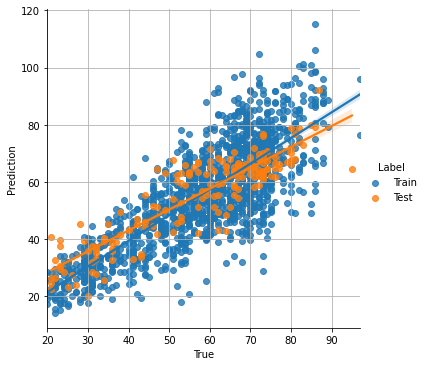

Saving ...
Epoch 82 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.7 sec [valid] 15.1 sec 
[TRAIN]:: Loss=137.030 Mae=9.104 Rmse=11.473 Corr=0.792 
[TEST ]:: Loss=69.579 Mae=6.808 Rmse=8.134 Corr=0.888 
Epoch 83 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.6 sec [valid] 15.4 sec 
[TRAIN]:: Loss=131.133 Mae=8.771 Rmse=11.169 Corr=0.795 
[TEST ]:: Loss=69.102 Mae=6.773 Rmse=8.106 Corr=0.888 
Epoch 84 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.1 sec [valid] 14.8 sec 
[TRAIN]:: Loss=128.836 Mae=8.742 Rmse=11.160 Corr=0.806 
[TEST ]:: Loss=69.229 Mae=6.782 Rmse=8.113 Corr=0.889 
Epoch 85 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.8 sec [valid] 14.9 sec 
[TRAIN]:: Loss=132.927 Mae=8.858 Rmse=11.268 Corr=0.799 
[TEST ]:: Loss=69.188 Mae=6.781 Rmse=8.111 Corr=0.888 
Epoch 86 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.4 sec [valid] 14.9 sec 
[TRAIN]:: Loss=132.660 Mae=8.883 Rmse=11.253 Corr=0.786 
[TES

Saving ...
Epoch 87 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.5 sec [valid] 14.9 sec 
[TRAIN]:: Loss=141.107 Mae=9.120 Rmse=11.655 Corr=0.787 
[TEST ]:: Loss=69.453 Mae=6.798 Rmse=8.127 Corr=0.888 
Epoch 88 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.1 sec [valid] 14.8 sec 
[TRAIN]:: Loss=132.532 Mae=8.892 Rmse=11.297 Corr=0.802 
[TEST ]:: Loss=69.335 Mae=6.791 Rmse=8.120 Corr=0.888 
Epoch 89 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 375.8 sec [valid] 14.9 sec 
[TRAIN]:: Loss=125.293 Mae=8.651 Rmse=10.971 Corr=0.802 
[TEST ]:: Loss=68.791 Mae=6.752 Rmse=8.088 Corr=0.888 
Epoch 90 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.9 sec [valid] 15.0 sec 
[TRAIN]:: Loss=132.180 Mae=8.874 Rmse=11.216 Corr=0.797 
[TEST ]:: Loss=69.340 Mae=6.790 Rmse=8.120 Corr=0.888 
Epoch 91 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.9 sec [valid] 14.8 sec 
[TRAIN]:: Loss=135.958 Mae=8.922 Rmse=11.408 Corr=0.781 
[TES

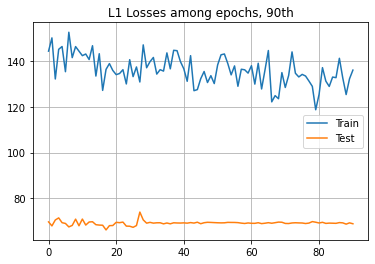

Saving ...
Epoch 92 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 375.5 sec [valid] 14.8 sec 
[TRAIN]:: Loss=137.131 Mae=8.908 Rmse=11.452 Corr=0.782 
[TEST ]:: Loss=69.080 Mae=6.772 Rmse=8.105 Corr=0.888 
Epoch 93 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 375.8 sec [valid] 15.1 sec 
[TRAIN]:: Loss=123.009 Mae=8.474 Rmse=10.813 Corr=0.804 
[TEST ]:: Loss=69.055 Mae=6.770 Rmse=8.103 Corr=0.888 
Epoch 94 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.2 sec [valid] 15.4 sec 
[TRAIN]:: Loss=129.953 Mae=8.666 Rmse=11.108 Corr=0.798 
[TEST ]:: Loss=69.347 Mae=6.790 Rmse=8.120 Corr=0.889 
Epoch 95 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.7 sec [valid] 15.0 sec 
[TRAIN]:: Loss=134.964 Mae=8.920 Rmse=11.362 Corr=0.787 
[TEST ]:: Loss=69.258 Mae=6.783 Rmse=8.115 Corr=0.888 
Epoch 96 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 376.5 sec [valid] 14.9 sec 
[TRAIN]:: Loss=122.460 Mae=8.565 Rmse=10.847 Corr=0.803 
[TES

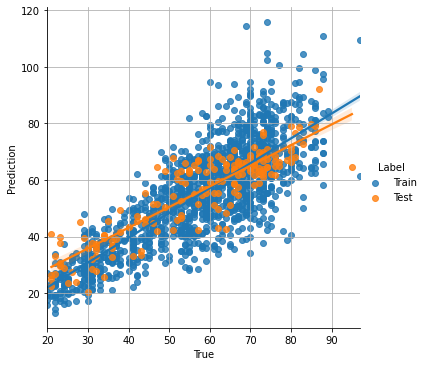

Saving ...
Epoch 97 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.3 sec [valid] 14.8 sec 
[TRAIN]:: Loss=132.841 Mae=8.778 Rmse=11.252 Corr=0.794 
[TEST ]:: Loss=69.343 Mae=6.790 Rmse=8.121 Corr=0.888 
Epoch 98 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.2 sec [valid] 15.0 sec 
[TRAIN]:: Loss=132.970 Mae=8.805 Rmse=11.314 Corr=0.794 
[TEST ]:: Loss=69.421 Mae=6.796 Rmse=8.125 Corr=0.888 
Epoch 99 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 378.0 sec [valid] 14.9 sec 
[TRAIN]:: Loss=141.141 Mae=9.125 Rmse=11.668 Corr=0.789 
[TEST ]:: Loss=69.308 Mae=6.787 Rmse=8.118 Corr=0.888 
Epoch 100 / 100 | BEST MAE 6.574 | LR 1.0000000000000004e-08
[train] 377.2 sec [valid] 15.0 sec 
[TRAIN]:: Loss=128.241 Mae=8.723 Rmse=11.126 Corr=0.802 
[TEST ]:: Loss=69.216 Mae=6.781 Rmse=8.113 Corr=0.888 
Saving ...


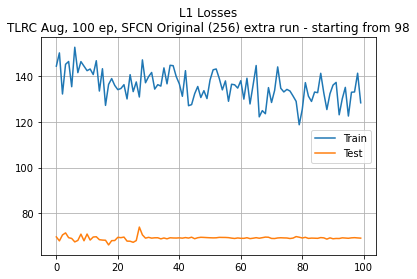

In [6]:
# mlflow.start_run(run_name=condition)

fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(cfg.epochs):

    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs} | BEST MAE {cfg.best_mae:.3f} | LR {optimizer.param_groups[0]["lr"]}')

    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)

    scheduler.step(tst_dp.mae[-1])
    elapsed_time = round(time.time() - start_time, 3)

    if cfg.best_mae > tst_dp.mae[-1]:

        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)

    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)

    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()

        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)

        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                            train=trn_dp, valid=tst_dp)
            write_db(db, data)

    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)

    torch.cuda.empty_cache()

# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

In [6]:
import yaml
cfg.best_mae = min(tst_dp.mae)
with open(f'./result/models/{run_date}/cfg.yml', 'w') as y:
    yaml.dump(cfg.get_dict(), y, default_flow_style=False)

In [7]:
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()

In [8]:
plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'G:\\My Drive'

### Unexpected stops - checkpoint

Epoch 91 / 100, BEST MAE 6.499
[train] 191.1 sec [valid] 21.0 sec 
[TRAIN]:: Loss=5.907 Mae=1.783 Rmse=2.289 Corr=0.989 
[TEST ]:: Loss=69.431 Mae=6.616 Rmse=8.106 Corr=0.883 


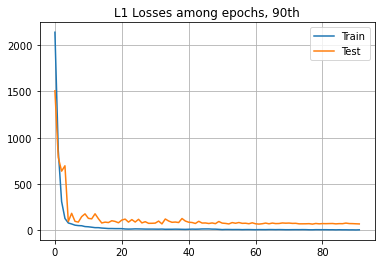

Saving ...


OSError: [WinError 433] A device which does not exist was specified: './result'

In [15]:
fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(e, cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

### kFold

In [8]:
models  = []
packets = []
tst_dp = DataPacket()

#### Whole Run

In [9]:
# test_db = make_db(page, client=client, schema=cfg['notion']['test_schema'], title='Test') if cfg['notion']['use'] else None
test_db = page.children[2]
fold_db = make_db(page, client=client, schema=cfg['notion']['schema'], title=f'Fold {fold+1}') if cfg['notion']['use'] else None

In [ ]:
for fold in range(16, cfg.folds):
    
    print(f'Fold {fold+1} / {cfg.folds}')
    mlflow.start_run(run_name=f'{today()} Fold {fold+1}')
    mlflow.log_params(params)
    mlflow.set_tags({
        'fold': fold+1
    })

    model, dps, res = run(cfg, fold, fold_db, mlflow=mlflow)
    models.append(model)
    packets.append(dps)
    
    cfg.test = True
    model, tst_dp, tst_res = eval(model, fn_lst, tst_dp, cfg, fold=None)
    
    df = pd.concat([make_df(res[0], 'Train'),
                   make_df(res[1], 'Valid'),
                   make_df(tst_res, 'Test')], ignore_index=True)
    
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()
    
    # Show Holdout testset information
    tst_dp.info('Holdout test')
    sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    if test_db:
        data = gather_data(f=fold, test=tst_dp)
        write_db(test_db, data)
    
    torch.cuda.empty_cache()
    clear_output(wait=True)

## Inference

In [8]:
dset = DatasetPlus(cfg, augment=False, test=True)
dataloader = DataLoader(dset, batch_size=cfg.batch_size)

device = cfg.device
model.eval()
predictions, targets = [], []
with torch.no_grad():
    for i, (x, y) in enumerate(dataloader):
        
        x, y = x.to(device), y.to(device)
        y_pred = model.forward(x).to(device).squeeze()
        predictions.append(y_pred.cpu())
        targets.append(y.cpu())
torch.cuda.empty_cache()

predictions = torch.cat(predictions).detach().numpy()
targets = torch.cat(targets).detach().numpy()

In [15]:
results = pd.DataFrame([predictions, targets, dset.data_files], index=['predictions', 'targets', 'fname']).T

In [17]:
results['diff'] = results.targets - results.predictions

In [29]:
results['abs_diff'].hist(bins=20)

<AxesSubplot:>

In [33]:
problematic = results[results['abs_diff'] > 10]

In [32]:
from utils.slice_viewer import *

In [36]:
sv = SliceViewer(problematic.iloc[0, 2])

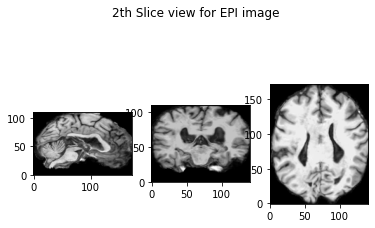

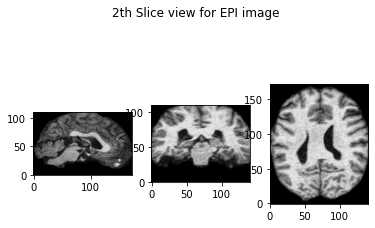

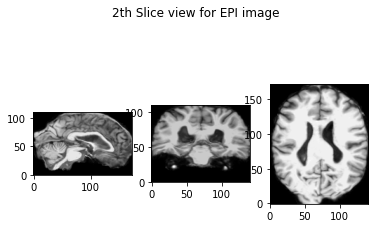

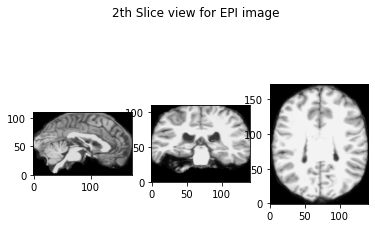

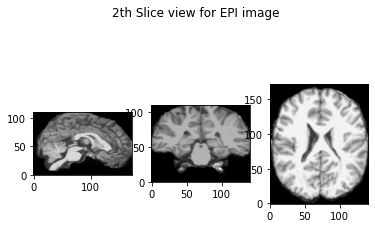

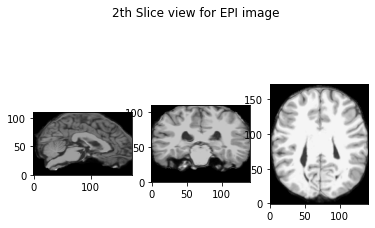

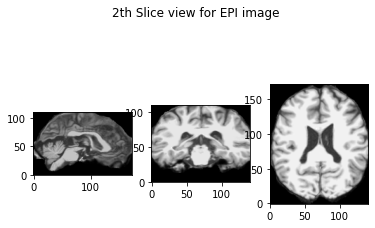

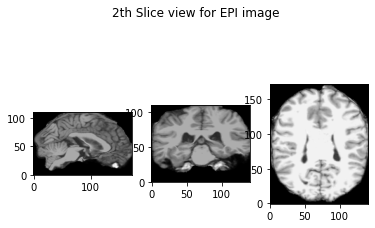

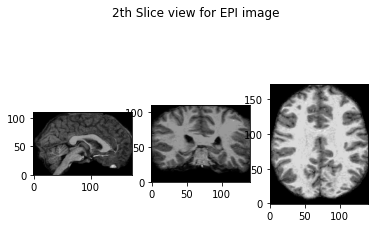

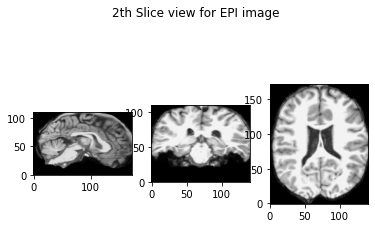

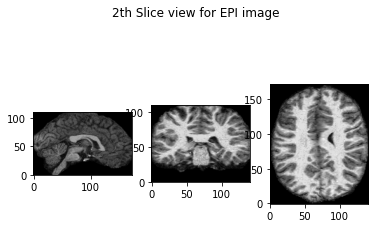

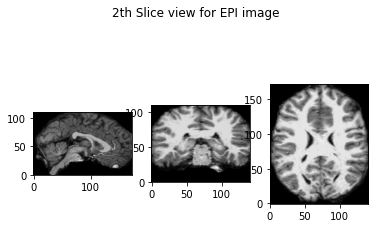

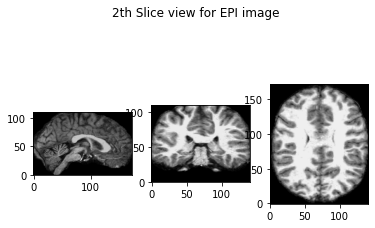

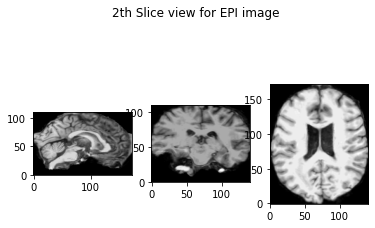

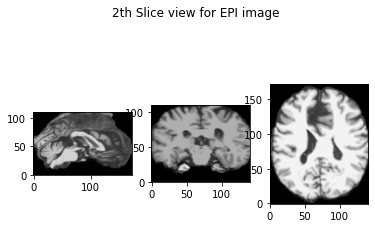

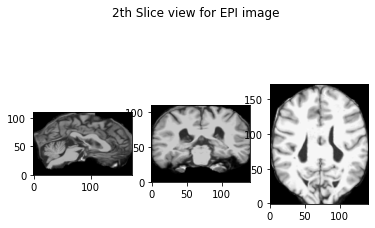

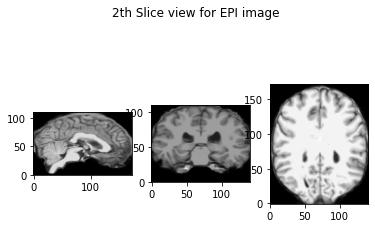

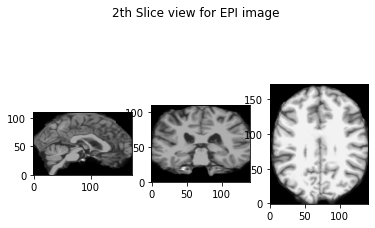

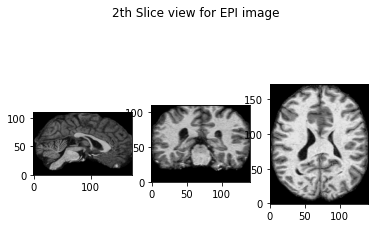

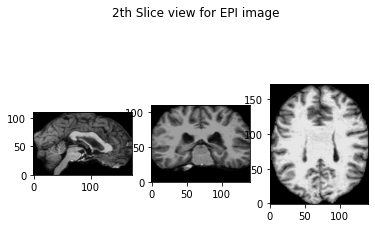

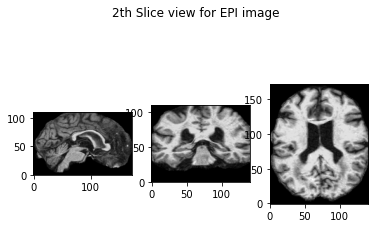

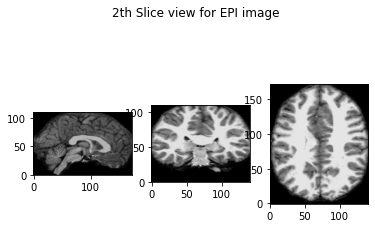

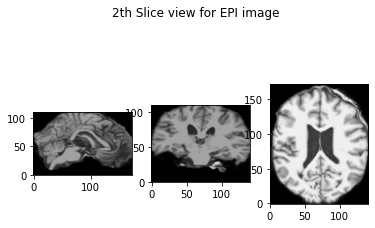

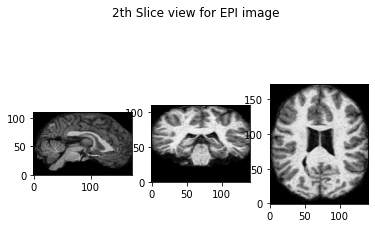

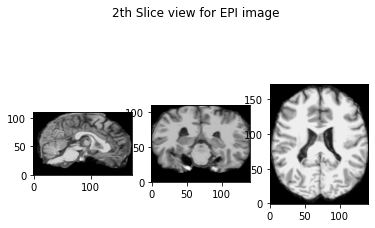

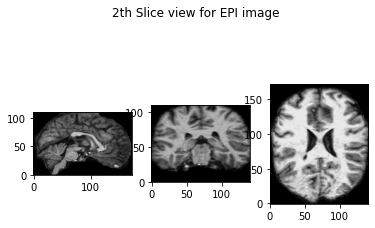

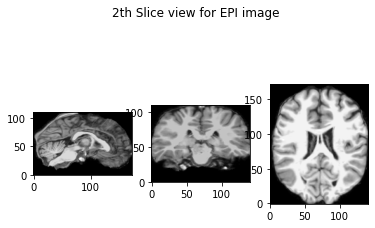

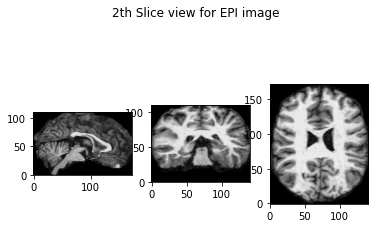

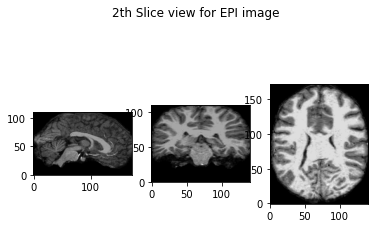

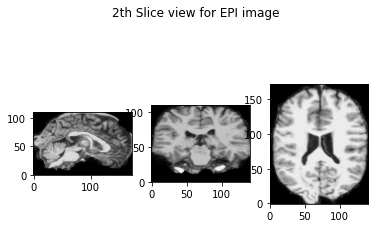

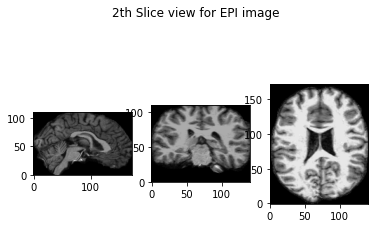

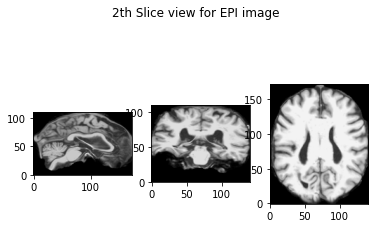

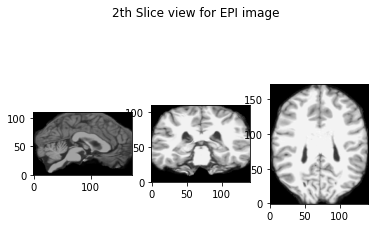

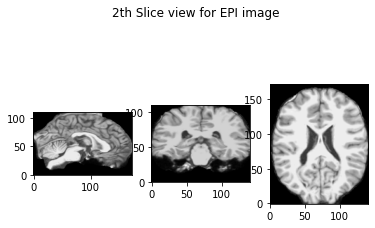

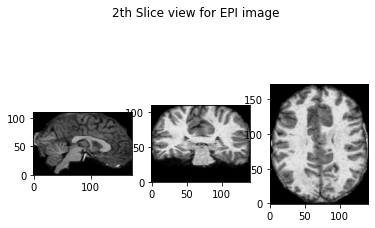

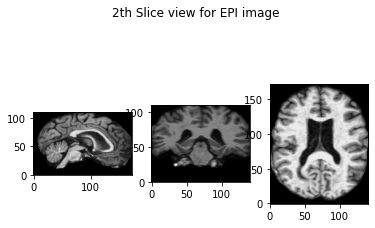

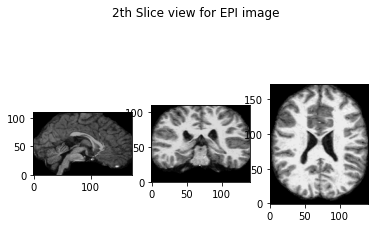

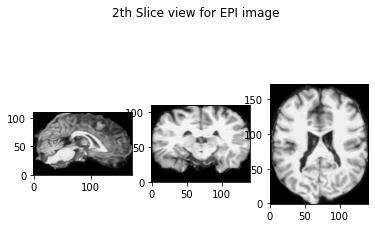

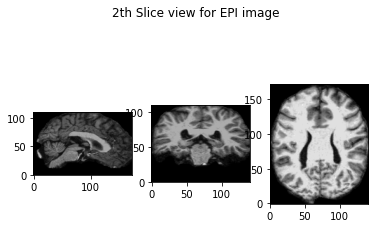

In [38]:
for fname in problematic.fname.values:
    
    SliceViewer(fname).triple_view()

## Ensemble

### Naive Averaging

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


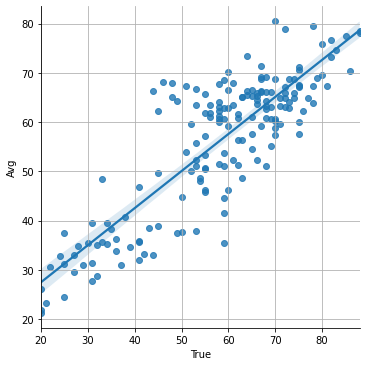

In [65]:
result_plot(ensemble_results)

### Blender

In [7]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [8]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [10]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [11]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = True
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


## SFCN Test

In [53]:
resnet, _ = load_model('resnet', verbose=True)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

In [119]:
cfg.model_name = 'sfcn'
model, cfg.device = load_model(cfg.model_name, verbose=False)
optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

Model Sfcn is selected.


In [120]:
state_dict = torch.load('../UKBiobank_deep_pretrain/brain_age/run_20190719_00_epoch_best_mae.p')
state_dict = dict(state_dict)
keys = list(map(lambda x: x.split('module.')[-1], state_dict.keys()))
state_dict = {k: v for k, v in zip(keys, state_dict.values())}
model.load_state_dict(state_dict)

<All keys matched successfully>

In [52]:
summary(model, input_size=(1, 160, 192, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1    [-1, 32, 160, 192, 160]             896
       BatchNorm3d-2    [-1, 32, 160, 192, 160]              64
         MaxPool3d-3       [-1, 32, 80, 96, 80]               0
              ReLU-4       [-1, 32, 80, 96, 80]               0
            Conv3d-5       [-1, 64, 80, 96, 80]          55,360
       BatchNorm3d-6       [-1, 64, 80, 96, 80]             128
         MaxPool3d-7       [-1, 64, 40, 48, 40]               0
              ReLU-8       [-1, 64, 40, 48, 40]               0
            Conv3d-9      [-1, 128, 40, 48, 40]         221,312
      BatchNorm3d-10      [-1, 128, 40, 48, 40]             256
        MaxPool3d-11      [-1, 128, 20, 24, 20]               0
             ReLU-12      [-1, 128, 20, 24, 20]               0
           Conv3d-13      [-1, 256, 20, 24, 20]         884,992
      BatchNorm3d-14      [-1, 256, 20,

In [122]:
cfg.test = True
test_dset = MyDataset(cfg, augment=False, fold=None)
test_dl = DataLoader(test_dset, batch_size=16)

In [123]:
from tqdm import tqdm

In [124]:
mae = nn.L1Loss()

In [125]:
len(test_dl)

175

In [141]:
model.to(cfg.device)
model.eval()
y_preds, ys = [], []
age_bins = torch.tensor([42+i for i in range(40)])
with torch.no_grad(): # to not give loads on GPU... :(
    for i, (x, y) in tqdm(enumerate(test_dl)):

        x, y = F.interpolate(x, size=(160, 192, 160)).to(cfg.device), y.to(cfg.device)

        y_pred = model.forward(x)[0].to(cfg.device)
        y_pred = (np.exp(y_pred.squeeze().cpu()) * age_bins).sum()
#         y_pred = y_pred.max(axis=1).indices.squeeze()
#         y_pred += 42
        y_preds.append(y_pred)
        ys.append(y.squeeze())
#             loss = mae(y_pred, y.squeeze())


torch.cuda.empty_cache()

175it [01:34,  1.85it/s]
